<a href="https://colab.research.google.com/github/divya-israni/IEEE---ML-AI/blob/main/stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MSE (mean squared error) is a loss function we use to tell how shitty our model is - want it as low as it can be (for regression - when data is constantly changing and we're predicting)
#MSE squared the difference in the actual value and predicted so negative numbers don't throw off our loss functions, but also so tha difference in data is bigger so we can tell, easier than j 0-1, squarin it makes the numbers bigger so we can notice them
#our stock model thing is a supervised learning problem, then regression, then we got our loss function

In [ ]:
!pip install yfinance #stock data off of yahoo

In [ ]:
from ast import increment_lineno
import pandas as pd #puts all your data into tables so we manipulate easy
import numpy as np #helps w math and manipulating matrices
import matplotlib.pyplot as plt #plotting thing
import seaborn as sns
import yfinance as yf
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
from sklearn.model_selection import train_test_split

%matplotlib inline

company = 'RBLX'
stock_data = yf.Ticker(company)

stock_history = stock_data.history(period='max',interval='1d') #set interval as one day
stock_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-10 00:00:00-05:00,64.500000,74.830002,60.500000,69.500000,97069300,0.0,0.0
2021-03-11 00:00:00-05:00,74.930000,77.779999,70.129997,73.900002,59629300,0.0,0.0
2021-03-12 00:00:00-05:00,72.470001,72.959999,69.110001,69.699997,19714700,0.0,0.0
2021-03-15 00:00:00-04:00,70.019997,74.059998,66.250000,72.150002,19549800,0.0,0.0
2021-03-16 00:00:00-04:00,73.730003,78.000000,73.180000,77.000000,30274400,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-17 00:00:00-04:00,30.070000,31.209999,30.000000,31.000000,8933800,0.0,0.0
2023-10-18 00:00:00-04:00,30.639999,30.809999,30.000000,30.190001,6356600,0.0,0.0
2023-10-19 00:00:00-04:00,30.410000,32.070000,30.020000,31.670000,11888400,0.0,0.0


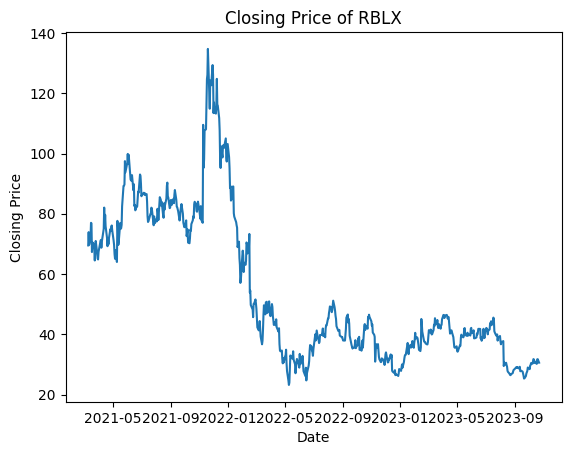

In [ ]:
closing_prices = stock_history['Close']
plt.title(f'Closing Price of {company}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(closing_prices)
plt.show()

In [ ]:
#split into training and testing data so we know how well our model actually works (use liek 20-30% of data for testing so it's big enough to identify errors, leave rest so model trains nice)
#if it does bad on testing data that means model wasn't ablt to predict; training data doesn't matter as much bc the model used this data to train/learn (alr seen it)
#random_state gives the same random data over and over if you set it equal to any number so its easier to see your work and you can see the same data (random_state is splitting your data randomly)
#shuffling data is based off random_state then
training_data, testing_data = train_test_split(stock_history,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
# Splitting the training data into X and y
X_train = training_data.drop(['Close','Volume','Dividends','Stock Splits'],axis=1)
y_train = training_data['Close']

# Splitting the testing data into X and y
X_test = testing_data.drop(['Close','Volume','Dividends','Stock Splits'],axis=1)
y_test = testing_data['Close']

#x input, y output

In [ ]:
#need a base model to compare, we are using a artificial neural network (our ANN solves our regression problem)
#gradient descent optimizes our weights; works with loss function to minimize loss
#regression is predicting continuous values (for our y); regression is a type of ML problem
#vanishing gradient is when derivative gets really small (expanding gradient opp i think)
#we initialize our weights this certain way bc its shown to do well through research

ann_model = Sequential()
#relu is an activation function that we do to introduce nonlinearity
#activation is relu also bc can't have negative for stock
ann_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones',input_shape=(X_train.shape[1],1)))
ann_model.add(Dropout(rate=0.2))

#dropout combats overfitting (when your model starts memorzing the outputs and inputs, loss function for test high but for training low; underfitting is when your model learns nothing (and doesn't memorize), so testing and training loss function is huge)
#dropout is a regulization method

#regulization method that randomly sets off nodes by multiplying them by 0 and puts pressure on every other node to know content abt the problem at hand bc those nodes are off (makes sure everything is prepared); this then regulizes the model and makes every node have a purpose to be there
#you should do this in your hidden layers but not output layers duh bc 0
#rate is saying 20% of those nodes/outputs to be set to 0
ann_model.add(Dense(50,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
ann_model.add(Dropout(rate=0.2))
ann_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
ann_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
#add more layers by experimenting and see how it affects the loss

ann_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3, 25)             50        
                                                                 
 dropout_2 (Dropout)         (None, 3, 25)             0         
                                                                 
 dense_5 (Dense)             (None, 3, 50)             1300      
                                                                 
 dropout_3 (Dropout)         (None, 3, 50)             0         
                                                                 
 dense_6 (Dense)             (None, 3, 25)             1275      
                                                                 
 dense_7 (Dense)             (None, 3, 1)              26        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.03)
loss_function = keras.losses.MeanSquaredError()
ann_model.compile(optimizer = optimizer,loss=loss_function)

In [ ]:
history = ann_model.fit(X_train,y_train,batch_size=32,epochs=50,shuffle=True)

Epoch 1/50
17/17 [==============================] - 1s 8ms/step - loss: 10903.6455
Epoch 2/50
17/17 [==============================] - 0s 8ms/step - loss: 3497.1721
Epoch 3/50
17/17 [==============================] - 0s 7ms/step - loss: 3497.1721
Epoch 4/50
17/17 [==============================] - 0s 8ms/step - loss: 3497.1719
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 3497.1719
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 3497.1716
Epoch 7/50
17/17 [==============================] - 0s 8ms/step - loss: 3497.1721
Epoch 8/50
17/17 [==============================] - 0s 8ms/step - loss: 3497.1721
Epoch 9/50
17/17 [==============================] - 0s 8ms/step - loss: 3497.1721
Epoch 10/50
17/17 [==============================] - 0s 7ms/step - loss: 3497.1721
Epoch 11/50
17/17 [==============================] - 0s 8ms/step - loss: 3497.1721
Epoch 12/50
17/17 [==============================] - 0s 8ms/step - loss: 3497.1714
Epoch 13/50


In [ ]:
training_loss = ann_model.evaluate(X_train,y_train,batch_size=32,verbose=0) #verbose means doesnt want anything printing out from model
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

#what this prints is how much we were generally off by (ass model)

Training Loss in Dollars: $59.13689304605565


In [ ]:
testing_loss = ann_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $60.42638212113977


In [ ]:
#sequence models are where our data is in some type of ordering sequence (ex. stock prices: dates are the sequence)
#language is a very important sequence type (the sequence matters, ex. words order in sentences matter)

#transforming this data into sequence data

raw_sequence_data_X = []
raw_sequence_data_Y = []
data_list = stock_history.drop(['Volume','Dividends','Stock Splits'],axis=1).values
# Iterating through each example in the stock data
for i in range(len(data_list)):
  sequence = [[0]*4] * 10 # creating a list of ten zeros

  # Checking if there are 10 days worth of past stock data
  if i < 10:
    for x in range(i):
      sequence[x] = list(data_list[x])
  else:
    index = 0
    for x in range(i-10,i):
      sequence[index] = list(data_list[x])
      index += 1
  raw_sequence_data_X.append(sequence)
  raw_sequence_data_Y.append(data_list[i][3])

In [ ]:
# Changing the lists into numpy arrays
sequence_X = np.array(raw_sequence_data_X)
sequence_Y = np.array(raw_sequence_data_Y)

# Checking the shape
sequence_X.shape

(661, 10, 4)

In [ ]:
# Finally, we need to split this data into training and testing
X_train, X_test, y_train, y_test = train_test_split(sequence_X,sequence_Y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
#for Recurrent Neural Networks basically each output you get gets fed as the input for the next one (has sequential property)
#takes in two inputs: current inputs from today and the past time steps stuff input from the previous day and so on?
#at each time stamp sending in data of xt and then sending the output back in at each time stamp i think
#you use the activation you get and out it in with some other stuff to get your y bc the a gives you it for 40 dimensional but you only want 1
#the weights are the same at each time stamp
#sends each at (activation time stamp) in when you do the nezt one, y^, your output, is not sent in
#ouput and prediction are different things in this, the output (y) is j your output but not necessarily your prediciton; a is your prediction which you send through the next one; i think you get a from y you j have to change some stuff based on dimension and stuff

# Implementing a basic RNN model for the project
rnn_model = Sequential()

# The 50 refers to how big we want our output vector, a_t, to be. In this case, we want it to be 50 dimensional.
# You can think of each row as containing some kind of feature regarding the data.
rnn_model.add(SimpleRNN(50,activation='tanh',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

# At the end of our RNN, we will get a 50 dimensional vector as our output.
# We need a single number so we will add an ANN on top of this RNN.
rnn_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
rnn_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

# Checking what the model looks like:
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2750      
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 4051 (15.82 KB)
Trainable params: 4051 (15.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
rnn_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = rnn_model.fit(X_train,y_train,batch_size=32,epochs=15,shuffle=True)

Epoch 1/15
17/17 [==============================] - 0s 10ms/step - loss: 689.9408
Epoch 2/15
17/17 [==============================] - 0s 11ms/step - loss: 630.5093
Epoch 3/15
17/17 [==============================] - 0s 14ms/step - loss: 607.2036
Epoch 4/15
17/17 [==============================] - 0s 17ms/step - loss: 654.1240
Epoch 5/15
17/17 [==============================] - 0s 17ms/step - loss: 696.8840
Epoch 6/15
17/17 [==============================] - 0s 17ms/step - loss: 678.8400
Epoch 7/15
17/17 [==============================] - 0s 17ms/step - loss: 724.9189
Epoch 8/15
17/17 [==============================] - 0s 18ms/step - loss: 696.9943
Epoch 9/15
17/17 [==============================] - 0s 17ms/step - loss: 686.0825
Epoch 10/15
17/17 [==============================] - 0s 17ms/step - loss: 617.4029
Epoch 11/15
17/17 [==============================] - 0s 18ms/step - loss: 760.2750
Epoch 12/15
17/17 [==============================] - 0s 15ms/step - loss: 672.2184
Epoch 13/15
1

In [ ]:
# Evaluating the model
training_loss = rnn_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $25.710738091751786


In [ ]:
# Evaluating the model
testing_loss = rnn_model.evaluate(X_test,y_test,batch_size=32,verbose=0) #verbose is j telling keras not to print out all the work/show how they got there
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $24.545485021912636


In [ ]:
#Gated Recurrent Unit (GRU)
#updategate computes how much of the old stuff to keep and contender tells how much of the new stuff to add, and then you can get your new output with this informaiton(at) which is a vector
#it helps so you only keep the memory you need and not just store everything and not know what's important like RNN
#gru improvement to RNN
#gru captures long term information well but not short term (puts both kinds in the same vector i think)
#the dog jumps over the moon; the not imprortnat, moon dog and jump would all be stored in the memory

# Building the GRU model
gru_model = Sequential()
gru_model.add(GRU(50,activation='tanh',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

# At the end of our GRU, we will get a 40 dimensional vector as our output.
# We need a single number so we will add an ANN on top of this RNN.
gru_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
gru_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

# Checking what the model looks like:
gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 50)                8400      
                                                                 
 dense_12 (Dense)            (None, 25)                1275      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 9701 (37.89 KB)
Trainable params: 9701 (37.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
gru_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = gru_model.fit(X_train,y_train,batch_size=32,epochs=15,shuffle=True)

Epoch 1/15
17/17 [==============================] - 4s 5ms/step - loss: 922.3408
Epoch 2/15
17/17 [==============================] - 0s 5ms/step - loss: 729.8155
Epoch 3/15
17/17 [==============================] - 0s 5ms/step - loss: 644.1662
Epoch 4/15
17/17 [==============================] - 0s 5ms/step - loss: 614.4465
Epoch 5/15
17/17 [==============================] - 0s 5ms/step - loss: 631.3190
Epoch 6/15
17/17 [==============================] - 0s 5ms/step - loss: 638.4039
Epoch 7/15
17/17 [==============================] - 0s 5ms/step - loss: 652.5457
Epoch 8/15
17/17 [==============================] - 0s 5ms/step - loss: 652.3058
Epoch 9/15
17/17 [==============================] - 0s 5ms/step - loss: 644.2672
Epoch 10/15
17/17 [==============================] - 0s 5ms/step - loss: 652.2770
Epoch 11/15
17/17 [==============================] - 0s 4ms/step - loss: 623.8314
Epoch 12/15
17/17 [==============================] - 0s 5ms/step - loss: 614.5739
Epoch 13/15
17/17 [======

In [ ]:
# Evaluating the model
training_loss = gru_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $24.982554948559855


In [ ]:
# Evaluating the model
testing_loss = gru_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $24.00648792310828


In [ ]:
#Long Short Term Memory (LSTM)
#added more gates than gru, have forgetgate, updategate, and output gate
#update gate tells us how much of the contender we should put into long term memory while contender tells us how much of the long term memory i think we should forget
#updategate is same as gru; how much we should update the long term memory by; tells us how much of the new information (contender_t) is important for building concepts over the sequence (w the equation)
#forgetgate tells us how much information we should forget regarding the current long-term memory (c_t-1)
#outputgate tells us how much we should output (short term memory) (a_t)
#c_t is long term memory i think
#the dog jumps over the moon; dog would be long term memory but over and moon short term memory
#equation same as gru but weights are different
#the matrices are different bc if they weren't there'd be no difference between update and forget gate; these gates do different things

# Building the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(30,activation='tanh',recurrent_activation='sigmoid',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

# At the end of our LSTM, we will get a 50 dimensional vector as our output.
# We need a single number so we will add an ANN on top of this RNN.
lstm_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
lstm_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

# Checking what the model looks like:
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4200      
                                                                 
 dense_14 (Dense)            (None, 25)                775       
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 5001 (19.54 KB)
Trainable params: 5001 (19.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
lstm_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = lstm_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
17/17 [==============================] - 2s 5ms/step - loss: 3497.1719
Epoch 2/5
17/17 [==============================] - 0s 5ms/step - loss: 3497.1719
Epoch 3/5
17/17 [==============================] - 0s 5ms/step - loss: 3497.1716
Epoch 4/5
17/17 [==============================] - 0s 5ms/step - loss: 3497.1719
Epoch 5/5
17/17 [==============================] - 0s 5ms/step - loss: 3497.1721


In [ ]:
# Evaluating the model
training_loss = lstm_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $59.13689304605565


In [ ]:
# Evaluating the model
testing_loss = lstm_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

#mine does worse, idk why

Testing Loss in Dollars: $60.42638212113977
